[2 2 2 2 0 0 0 0 0 1 1 1 1 1]


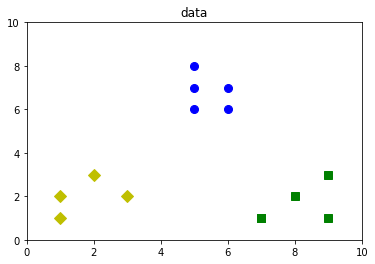

In [10]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

x1 = np.array([1,2,3,1,5,6,5,5,6,7,8,9,7,9])
x2 = np.array([1,3,2,2,8,6,7,6,7,1,2,1,1,3]) 

x = np.c_[x1, x2] 

# 모델 선택
kmeans = KMeans(n_clusters=3)

# 학습
kmeans_model = kmeans.fit(x)
print(kmeans_model.labels_)

# 시각화
colors = ['b','g','y']
markers = ['o', 's', 'D']

# mfc = marker face color
# mew = 마커 선 굵기 marker edge width
# mec = 마커의 선 색깔 marker edge color
# ms = 마커의 크기 marker size
for i,l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls='None', ms=8)
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    plt.title('data')

plt.show()

In [ ]:
비지도학습

클러스터링 : 클래스 분류 방법 중 정답 레이블이 없는 클래스를 분류(실행 속도가 빠르고 확장성)
    복수의 샘플 데이터가 많은 경우, 패턴이 모호한 경우 등에 적용한다.
        ex) 고객 세분화, 유전자 분류
        
k-means : 정답 레이블이 있는 데이터를 분류
          K - 클러스터 수를 나타내며 반드시 데이터 수보다 작은 값으로 지정(클래스 수 < 데이터 개수)
        
    [step 01] 표본 공간 k개의 중심을 무작위로 생성하기
    [step 02] 각 표본을 가장 가까운 중심에 할당
    [step 03] 각 군집의 중심을 새롭게 계산하기

In [58]:
# 데이터를 패턴을 이용해서 나누어 묶자 
# K-means(K 평균 군집화 알고리즘)이용해서 선수들의 체력과 드리블 능력, 상, 중, 하  3개의 팀으로 분류하자
import pandas as pd
import numpy as np

# step 1) 데이터 로드 : 원본에서 overall(능력치)를 기준으로 내림차순하자. 200명만
data = pd.read_csv('fifa2019.csv')
df = pd.DataFrame.copy(data.sort_values(by='Overall', ascending=False).head(200))

# step 2) 원하는 컬럼을 추출해서 학습데이터를 준비하자
# 이름, 체력, 드리블, 짧은패스, 페널티킥의 리스트를 만들자
test_features = ['Name', 'Stamina', 'Dribbling', 'ShortPassing', 'Penalties']

# 2-2) df, test_features로 test_df로 프레임을 생성하자
test_df = pd.DataFrame(df, columns=test_features)
test_df.head(5)

# 2-3) test_df 데이터프레임을 이용해서 XY로 넘파이 배열
XY = np.array(test_df)

# 출력 확인
# print(XY)

# X 선수정보 : XY 배열에 속한 선수들[:]의 체력(1번열), 드리블,,,
X = XY[:,1:3]
# print(X)
# print(len(X))

C_x array : [83.0 92.0 91.0]
C_y array : [83.0 79.0 85.0]


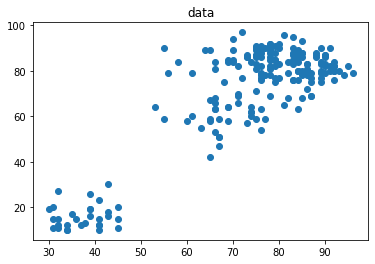

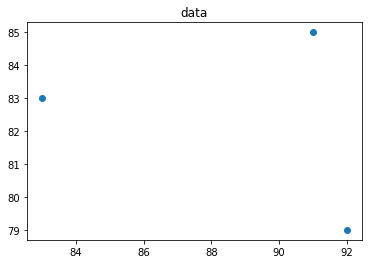

In [59]:
# step3) k-평균 군집화 알고리즘 적용
#  [3-01] 표본 공간 k개의 중심을 무작위로 생성하기
#    X 배열 [0 체력], [1 드리블] -> 무작위로 3개를 뽑아서 2차원 배열 C[체력 무작위3, 드리블 무작위3]를 생성하자
k = 3  # 분류하는 군집의 개수(K) 3

# C_x : X배열에서 체력데이터(0)를 무작위로 3개만 추출해서 1차원 배열로 생성 np.random.choice(대상, 개수)
C_x = np.random.choice(X[:,0],3)
print("C_x array :",C_x)

# C_y : X배열에서 드리블데이터(1)를 무작위로 3개만 추출해서 1차원 배열로 생성 np.random.choice(대상, 개수)
C_y = np.random.choice(X[:,1],3)
print("C_y array :",C_y)

# Res 라는 임의 변수를 생성헤서 C_x, C_y로 묶자
Res = list(zip(C_x, C_y))

# C라는 중심점 배열을 생성
C = np.array(list(zip(C_x, C_y)))
C

# 확인 _VIew
Stamina = test_df['Stamina']
Dribbling = test_df['Dribbling']

plt.title('data')
plt.scatter(Stamina, Dribbling)
plt.show()

plt.title('data')
plt.scatter(C_x, C_y)
plt.show()

In [60]:
#  [3-02] 각 표본을 가장 가까운 중심에 할당
# 거리를 추측 하는 함수 유클리디안 거리 계산 함수
def Distance(A,B):
    return np.sqrt(np.sum(np.power(A-B, 2)))

X(선수정보) : 축구선수 체력(1열), 드리블(2열)
    
C 배열 : 현재 중심 위치값
    
temp = Distance(X[i], C[i])
   - C[i] 군집중심과 선수 데이터 X[i] 간의 거리를 계산한 결과를 리턴
   - distance.append(temp)
    
clusters 배열
   - 입력값과 각 중심값 사이의 거리 중 가장 짧은 거리의 인덱스 저장

[3-03] 각 군집의 중심 C을 새롭게 계산하기
 - points 리스트 : 군집의 중심값 별로 데이터를 모아서 points 리스트에 저장함
        
 - C 배열 : points 값의 평균을 구해서 업데이트한 중심 위치값
    
 - C_old : 이전 중심값
    
 - flag : C, C_old의 유클리드 거리를 구한 값

In [61]:
# [3-03] 각 군집의 중심 C을 새롭게 계산하기
# 현재 중심 위치값과 이전 중심 위치값의 거리 구하기
# C_old 배열 만들기
C_old = np.zeros(C.shape)

# 클러스트 배열(입력값과 각 중심값 사이의 거리 중 가장 짧은 거리의 인덱스 저장)
clusters = np.zeros(len(X))

# C배열(체력과 드리블 3*2), C_old(초기값으로 채운 배열)
flag = Distance(C, C_old)

print("C_old", C_old)
print("C", C)
print("flag", flag)

C_old [[0. 0.]
 [0. 0.]
 [0. 0.]]
C [[83. 83.]
 [92. 79.]
 [91. 85.]]
flag 209.73554777385735


In [62]:
from copy import deepcopy
distances = []   # 군집 중심과 데이터간의 거리계산 결과를 저장

# 군집 중심 좌표의 변화가 없을 떄까지 while 루프를 통해 반복 실행
while flag != 0:
    # for 문을 이용해서 선수들 각각 체력, 드리블 값과 임의의 군집중심 값의 거리
    for i in range(len(X)):  # 선수 데이터
        for j in range(3):   # 중심 위치(C) 3개
            temp = Distance(X[i], C[j])
            distances.append(temp)
            
        # distance의 최소값을 가진 인덱스 번호를 저장
        cluster = np.argmin(distances)
        clusters[i] = cluster
        distances = []
        
    print("cluster :", clusters)   # 200명의 선수가 순서대로 어떤 군집에 해당되는지 0,1,2 숫자로 매칭된다.
    print('============ 2단계 끝[각 표본에 가까운 중심 할당] ==============')
    
    # 지금까지 사용된 중심을 C_old에 대입
    C_old = deepcopy(C)
    
    for i in range(k):
        # 같은 군집의 중심값 별로 데이터를 모아서 points 리스트에 저장
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        print('i :', i, 'points :', points)
        
        # points의 평균값을 계산해서 C[i]에 대입
        C[i] = np.mean(points)
    
    flag = Distance(C, C_old)
    print('============= 3단계 끝 : 각 군집의 중심을 새롭게 ===============')

cluster : [0. 2. 0. 0. 2. 0. 2. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 2. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 2. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 1. 0. 1. 0. 0. 1. 0. 2. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 2. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 2. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 0. 0. 2. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 2. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1.]
============ 2단계 끝[각 표본에 가까운 중심 할당] ==============
i : 0 points : [array([72.0, 97.0], dtype=object), array([81.0, 96.0], dtype=object), array([43.0, 18.0], dtype=object), array([83.0, 95.0], dtype=object), array([66.0, 53.0], dtype=object), array([78.0, 89.0], dtype=object), array([41.0, 12.0], dtype=object), array([75.0, 81.0], dtype=object), array([78.0, 85.0], dtype=object)

 1. 1. 1. 1. 0. 1. 1. 1.]
============ 2단계 끝[각 표본에 가까운 중심 할당] ==============
i : 0 points : [array([43.0, 18.0], dtype=object), array([84.0, 63.0], dtype=object), array([66.0, 53.0], dtype=object), array([41.0, 12.0], dtype=object), array([65.0, 58.0], dtype=object), array([43.0, 30.0], dtype=object), array([38.0, 13.0], dtype=object), array([35.0, 17.0], dtype=object), array([66.0, 68.0], dtype=object), array([39.0, 26.0], dtype=object), array([41.0, 12.0], dtype=object), array([74.0, 62.0], dtype=object), array([41.0, 10.0], dtype=object), array([65.0, 59.0], dtype=object), array([75.0, 71.0], dtype=object), array([39.0, 16.0], dtype=object), array([71.0, 66.0], dtype=object), array([78.0, 69.0], dtype=object), array([55.0, 90.0], dtype=object), array([69.0, 64.0], dtype=object), array([74.0, 62.0], dtype=object), array([71.0, 69.0], dtype=object), array([41.0, 23.0], dtype=object), array([73.0, 57.0], dtype=object), array([71.0, 70.0], dtype=object), array([61.0, 60.0], dtype=object

cluster : [2. 2. 2. 0. 2. 2. 2. 2. 1. 1. 2. 0. 1. 1. 2. 1. 2. 0. 2. 2. 0. 0. 2. 2.
 2. 1. 0. 0. 1. 1. 0. 1. 2. 2. 1. 2. 2. 2. 1. 1. 2. 2. 1. 1. 2. 2. 1. 2.
 2. 2. 0. 2. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 0. 2. 2. 1. 2. 2.
 1. 2. 2. 2. 2. 1. 1. 1. 2. 1. 1. 2. 1. 2. 1. 1. 2. 1. 2. 1. 1. 2. 2. 2.
 1. 2. 1. 0. 0. 2. 2. 2. 2. 2. 1. 1. 1. 2. 1. 1. 0. 2. 1. 1. 2. 2. 1. 2.
 2. 1. 1. 0. 1. 0. 0. 2. 1. 1. 1. 0. 1. 0. 2. 1. 0. 2. 2. 0. 1. 2. 2. 1.
 1. 1. 1. 2. 2. 1. 0. 0. 2. 2. 1. 1. 2. 1. 1. 1. 0. 2. 2. 2. 0. 0. 2. 1.
 1. 2. 1. 0. 1. 2. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 2.
 2. 1. 2. 1. 1. 2. 2. 2.]
============ 2단계 끝[각 표본에 가까운 중심 할당] ==============
i : 0 points : [array([43.0, 18.0], dtype=object), array([41.0, 12.0], dtype=object), array([43.0, 30.0], dtype=object), array([38.0, 13.0], dtype=object), array([35.0, 17.0], dtype=object), array([39.0, 26.0], dtype=object), array([41.0, 12.0], dtype=object), array([41.0, 10.0], dtype=object), array([39.0, 16.0], dtype=object)

cluster : [2. 2. 2. 0. 2. 2. 2. 2. 1. 1. 2. 0. 2. 2. 2. 1. 2. 0. 2. 2. 0. 0. 2. 2.
 2. 1. 0. 0. 1. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2.
 2. 2. 0. 2. 1. 1. 1. 2. 1. 2. 1. 1. 2. 1. 1. 2. 2. 2. 0. 2. 2. 1. 2. 2.
 1. 2. 2. 2. 2. 1. 1. 2. 2. 2. 1. 2. 1. 2. 1. 2. 2. 1. 2. 1. 1. 2. 2. 2.
 1. 2. 2. 0. 0. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2.
 2. 1. 1. 0. 1. 0. 1. 2. 1. 2. 1. 0. 2. 0. 2. 2. 1. 2. 2. 1. 2. 2. 2. 1.
 1. 2. 1. 2. 2. 1. 0. 0. 2. 2. 2. 1. 2. 2. 1. 2. 0. 2. 2. 2. 0. 0. 2. 2.
 2. 2. 1. 0. 1. 2. 0. 1. 0. 1. 2. 1. 2. 0. 2. 1. 0. 0. 0. 1. 1. 1. 0. 2.
 2. 2. 2. 2. 1. 2. 2. 2.]
============ 2단계 끝[각 표본에 가까운 중심 할당] ==============
i : 0 points : [array([43.0, 18.0], dtype=object), array([41.0, 12.0], dtype=object), array([43.0, 30.0], dtype=object), array([38.0, 13.0], dtype=object), array([35.0, 17.0], dtype=object), array([39.0, 26.0], dtype=object), array([41.0, 12.0], dtype=object), array([41.0, 10.0], dtype=object), array([39.0, 16.0], dtype=object)

cluster : [2. 2. 2. 0. 2. 2. 2. 2. 1. 1. 2. 0. 2. 2. 2. 1. 2. 0. 2. 2. 0. 0. 2. 2.
 2. 1. 0. 0. 1. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2.
 2. 2. 0. 2. 1. 1. 1. 2. 1. 2. 2. 1. 2. 1. 1. 2. 2. 2. 0. 2. 2. 1. 2. 2.
 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 1. 2. 1. 2. 2. 1. 2. 1. 1. 2. 2. 2.
 1. 2. 2. 0. 0. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 1. 0. 1. 0. 1. 2. 1. 2. 2. 0. 2. 0. 2. 2. 1. 2. 2. 1. 2. 2. 2. 1.
 1. 2. 1. 2. 2. 1. 0. 0. 2. 2. 2. 1. 2. 2. 2. 2. 0. 2. 2. 2. 0. 0. 2. 2.
 2. 2. 2. 0. 1. 2. 0. 1. 0. 1. 2. 1. 2. 0. 2. 1. 0. 0. 0. 2. 1. 1. 0. 2.
 2. 2. 2. 2. 1. 2. 2. 2.]
============ 2단계 끝[각 표본에 가까운 중심 할당] ==============
i : 0 points : [array([43.0, 18.0], dtype=object), array([41.0, 12.0], dtype=object), array([43.0, 30.0], dtype=object), array([38.0, 13.0], dtype=object), array([35.0, 17.0], dtype=object), array([39.0, 26.0], dtype=object), array([41.0, 12.0], dtype=object), array([41.0, 10.0], dtype=object), array([39.0, 16.0], dtype=object)

 2. 2. 2. 2. 1. 2. 2. 2.]
============ 2단계 끝[각 표본에 가까운 중심 할당] ==============
i : 0 points : [array([43.0, 18.0], dtype=object), array([41.0, 12.0], dtype=object), array([43.0, 30.0], dtype=object), array([38.0, 13.0], dtype=object), array([35.0, 17.0], dtype=object), array([39.0, 26.0], dtype=object), array([41.0, 12.0], dtype=object), array([41.0, 10.0], dtype=object), array([39.0, 16.0], dtype=object), array([41.0, 23.0], dtype=object), array([45.0, 11.0], dtype=object), array([32.0, 27.0], dtype=object), array([41.0, 15.0], dtype=object), array([37.0, 12.0], dtype=object), array([34.0, 12.0], dtype=object), array([34.0, 10.0], dtype=object), array([43.0, 16.0], dtype=object), array([30.0, 19.0], dtype=object), array([36.0, 15.0], dtype=object), array([32.0, 11.0], dtype=object), array([39.0, 19.0], dtype=object), array([39.0, 19.0], dtype=object), array([31.0, 15.0], dtype=object), array([34.0, 10.0], dtype=object), array([31.0, 11.0], dtype=object), array([32.0, 15.0], dtype=object

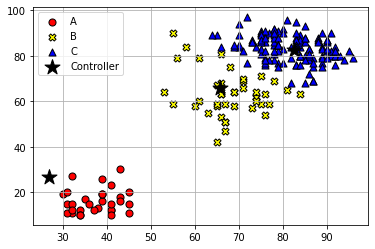

In [63]:
# 군집화 결과를 시각화
import matplotlib.pyplot as plt

# 1군집
plt.scatter(X[clusters==0,0], X[clusters==0,1], s=50, c='red', marker='o', edgecolor='black', label='A')

# 2군집
plt.scatter(X[clusters==1,0], X[clusters==1,1], s=50, c='yellow', marker='X', edgecolor='black', label='B')

# 3군집
plt.scatter(X[clusters==2,0], X[clusters==2,1], s=50, c='blue', marker='^', edgecolor='black', label='C')

# 중심 좌표
plt.scatter(C[:,0], C[:,1], s=250, c='black', marker='*', edgecolor='black', label='Controller')

plt.legend()
plt.grid()
plt.show()

In [ ]:
K-NN(k-nearest neighbor algorithm)
 - 특징 공간에서 가장 가까운 훈련 예에 따라 분류 방법이며, 패턴 인식에 자주 사용되고 회귀 분석에 사용된다.
 - 분류 및 회귀에 사용하는 알고리즘
 - 연동원리 : n차원에 대한 벡터로 특수 공간을 생성하면 데이터간의 거리가 생긴다. 유클리드 공식으로 거리를 계산
    분류에서 목적 변수가 알수 없는 데이터가 있을 경우 그 데이터의 목적 변수를 특수 공간에 가장 가까운 다른 데이터의 목적 
    변수가 많은 곳으로 결정된다.
    
    회귀일 경우에는 알수 없는 데이터가 있을 경우 그 데이터의 목적 변수를 특수 공간에 가장 가까운 다른 데이터의 목적 
    변수 평균을 목적 데이터로 결정된다.
    
 

In [84]:
# 2. K-NN으로 분류를 해보자
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)  # X
iris_target_data = pd.DataFrame(iris.target, columns=['Species'])  # y

print(iris_df)
print(iris_target_data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
     Species
0          0
1          0
2

In [85]:
# 데이터 분철
X_train, X_test, y_train, y_test = train_test_split(iris_df, iris_target_data, test_size=0.25, random_state=0)

# 분류 모델
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)  # 학습
y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))  # 정확도 예측

0.9736842105263158


<ipython-input-85-2a21e6f25249>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)  # 학습


<ipython-input-86-559537dbc3ab>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)  # 학습
<ipython-input-86-559537dbc3ab>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)  # 학습
<ipython-input-86-559537dbc3ab>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)  # 학습
<ipython-input-86-559537dbc3ab>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)  # 학습
<ipython-input-86-559537dbc3ab>:10: DataConversionWarning: A column-vector y was passed when a 1

<ipython-input-86-559537dbc3ab>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)  # 학습
<ipython-input-86-559537dbc3ab>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)  # 학습
<ipython-input-86-559537dbc3ab>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)  # 학습
<ipython-input-86-559537dbc3ab>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)  # 학습
<ipython-input-86-559537dbc3ab>:10: DataConversionWarning: A column-vector y was passed when a 1

<ipython-input-86-559537dbc3ab>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)  # 학습
<ipython-input-86-559537dbc3ab>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)  # 학습
<ipython-input-86-559537dbc3ab>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)  # 학습
<ipython-input-86-559537dbc3ab>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)  # 학습
<ipython-input-86-559537dbc3ab>:10: DataConversionWarning: A column-vector y was passed when a 1

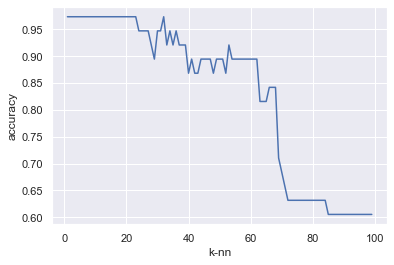

In [86]:
# 3. 이웃하는 데이터 수를 변경하고 정밀도의 변화를 확인해보자
import seaborn as sns

accuracy_list = []
sns.set()
k_range = range(1,100)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # 학습
    y_pred = knn.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(y_test, y_pred))

figure = plt.figure()
ax = figure.add_subplot(111)
ax.plot(k_range, accuracy_list)
ax.set_xlabel('k-nn')
ax.set_ylabel('accuracy')
plt.show()

In [87]:
# 4. 회귀를 구현해보자. K-NN의 알고리즘을 이용
from sklearn.neighbors import *
from sklearn.metrics import *  # mean_squared_error, mean_absolute_error
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

X = boston_df
y = boston.target

# 학습 데이터 분류
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# 학습 모델
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_pred = knr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)  # 오차값을 구해서 절대값을 평균한 것
rmae = np.sqrt(mean_squared_error(y_test, y_pred))  # 오차값을 구해서 평균 제곱근을 구한값

print('평균 절대 오차 :', mae)
print('제곱 평균의 제곱은 오차 :', rmae)

평균 절대 오차 : 4.330551181102361
제곱 평균의 제곱은 오차 : 6.632016118442083


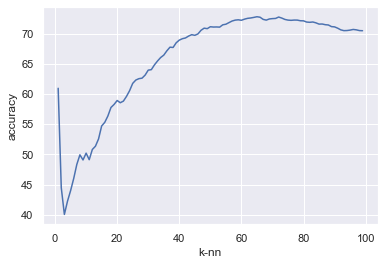

In [88]:
# 4. 이웃하는 데이터 수를 변경하고 정밀도의 변화를 확인해보자
import seaborn as sns

mae_list = []
sns.set()
k_range = range(1,100)

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)  # 학습
    y_pred = knn.predict(X_test)
    mae_list.append(mean_squared_error(y_test, y_pred))

figure = plt.figure()
ax = figure.add_subplot(111)
ax.plot(k_range, mae_list)
ax.set_xlabel('k-nn')
ax.set_ylabel('accuracy')
plt.show()

In [ ]:
K-NN : 예측 데이터에 가장 가까운 훈련데이터로 예측하는 방법
 특징
  1. 알려져 있는 범주로 알려지지 않은 범주를 분류하는데 사용
  2. 기존의 범주가 존재
  3. 단 한번의 거리계산으로 값을 예측한다(n_neighbors의 개수로)
  4. 전처리가 중요하다.(결손치, 이상치)
  5. 특징이 많은 데이터셋은 부적절하다
  6. Euclidean distance 계산식
  7. 적용분야 : 개인별 영화추천, 이미지/비디오 얼굴과 글자인식, 유전자 데이터 패턴(양성, 음성) 식별 등

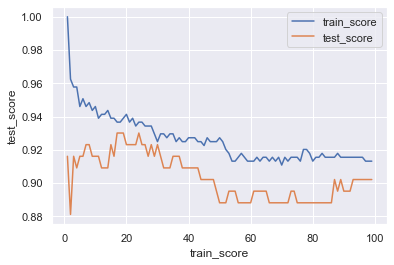

In [96]:
# 5. sklearn.datasets.load_breast_cancer로 분류작업을 해보자
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=cancer.target, random_state=0)

train_accuracy_list = []
test_accuracy_list = []

k_range = range(1,100)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # 학습
    train_accuracy_list.append(knn.score(X_train, y_train))  # 훈련에 대한 정확도
    test_accuracy_list.append(knn.score(X_test, y_test))  # 테스트에 대한 정확도

figure = plt.figure()
ax = figure.add_subplot(111)
ax.plot(k_range, train_accuracy_list, label='train_score')
ax.plot(k_range, test_accuracy_list, label='test_score')
ax.set_xlabel('train_score')
ax.set_ylabel('test_score')
ax.legend()
plt.show()  # 88% ~ 100% -> 정확도가 높다. 6인 지점에서 정확도가 높다. K-NN은 n_neighbors를 조정해서 성능평가

In [97]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [98]:
# 데이터 로드
iris = datasets.load_iris()
print('레이블 :', iris.feature_names)
print('모양 :', iris.data.shape)
print('10개의 데이터 표시 :', iris.data[0:10,:], '\n')

# 목적 변수
print('레이블 :', iris.target_names)
print('모양 :', iris.target.shape)
print('전체보기 :', iris.target)

레이블 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
모양 : (150, 4)
10개의 데이터 표시 : [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]] 

레이블 : ['setosa' 'versicolor' 'virginica']
모양 : (150,)
전체보기 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


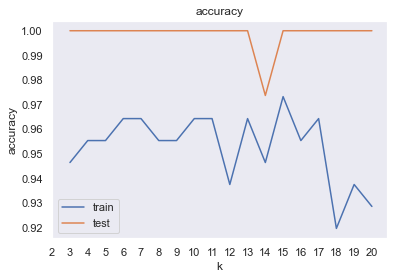

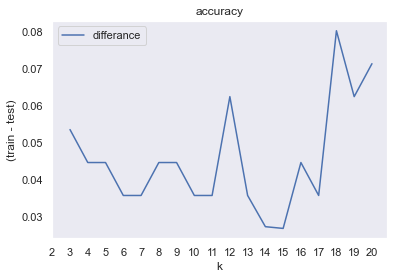

In [104]:
# 데이터 세트 분할
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=iris.target, random_state=0)
# y_train.shape

np.unique(y_train, return_counts=True)

# 모델링
train_accuracy_list = []
test_accuracy_list = []

k_range = range(3, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # 학습
    train_accuracy_list.append(knn.score(X_train, y_train))  # 훈련에 대한 정확도
    test_accuracy_list.append(knn.score(X_test, y_test))  # 테스트에 대한 정확도
    
train_accuracy_list = np.array(train_accuracy_list)
test_accuracy_list = np.array(test_accuracy_list)

plt.figure(figsize = (6,4))
plt.plot(range(3,21), train_accuracy_list, label='train')
plt.plot(range(3,21), test_accuracy_list, label='test')

# 축의 눈금
plt.xticks(np.arange(2,21,1))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('accuracy')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize = (6,4))
diff = np.abs(train_accuracy_list - test_accuracy_list)
plt.plot(range(3,21), diff, label='differance')

# 축의 눈금
plt.xticks(np.arange(2,21,1))
plt.xlabel('k')
plt.ylabel('(train - test)')
plt.title('accuracy')
plt.grid()
plt.legend()
plt.show()

ret : 0.0
results : [[0.]]
neighbors : [[0. 0. 0.]]
dist : [[ 37. 202. 221.]]


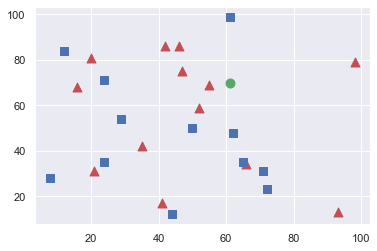

In [113]:
import cv2
train_D = np.random.randint(0,100,(25,2)).astype(np.float32)
train_D

res_D = np.random.randint(0,2,(25,1)).astype(np.float32)
res_D

new_D = np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(new_D[:,0], new_D[:,1], 80, 'g', 'o')

red = train_D[res_D.ravel() == 0]
plt.scatter(red[:,0], red[:,1], 80, 'r', '^')

blue = train_D[res_D.ravel() == 1]
plt.scatter(blue[:,0], blue[:,1], 80, 'b', 's')

knn = cv2.ml.KNearest_create()
knn.train(train_D, cv2.ml.ROW_SAMPLE, res_D)
ret, results, neighbors, dist = knn.findNearest(new_D, 3)  # 기존 데이터에 새로 그린 동그라미 근처에 3개를 찾아서 그룹에 속해라
print('ret :', ret)
print('results :', results)
print('neighbors :', neighbors)
print('dist :', dist)

plt.show()